# EDA: Product Retail Sales

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = "Product_retail_sales.csv"
df = pd.read_csv(csv_path)
df.head()

Matplotlib is building the font cache; this may take a moment.


,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager
0,2023-02-23,East,Laptop,14,163.60,Store B,Wholesale,0.00,Eva,2290.400,Online,FREESHIP,0,REG100000,Cust 6583,43.34,2023-02-23,2023-02-27,Eric
1,2024-12-19,South,Phone,1,544.01,Store A,Retail,0.00,Alice,544.010,Gift Card,SAVE10,0,REG100001,Cust 2144,5.30,2024-12-19,2024-12-28,Sophie
2,2023-05-10,North,Desk,14,346.18,Store B,Wholesale,0.10,Alice,4361.868,Online,WINTER15,0,REG100002,Cust 5998,20.46,2023-05-10,2023-05-19,Ryan
3,2025-02-26,Central,Chair,18,384.82,Store A,Wholesale,0.15,Frank,5887.746,Gift Card,FREESHIP,0,REG100003,Cust 7136,27.95,2025-02-26,2025-03-02,Cameron
4,2023-06-24,East,Desk,18,237.76,Store C,Retail,0.00,Carlos,4279.680,Online,SAVE10,0,REG100004,Cust 6506,5.73,2023-06-24,2023-06-27,Eric


### Structure

In [2]:
import io
buf = io.StringIO()
df.info(buf=buf)
print(buf.getvalue())

df.describe(include=[np.number]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1500 non-null   object 
 1   Region         1500 non-null   object 
 2   Product        1500 non-null   object 
 3   Quantity       1500 non-null   int64  
 4   UnitPrice      1500 non-null   float64
 5   StoreLocation  1500 non-null   object 
 6   CustomerType   1500 non-null   object 
 7   Discount       1500 non-null   float64
 8   Salesperson    1500 non-null   object 
 9   TotalPrice     1500 non-null   float64
 10  PaymentMethod  1500 non-null   object 
 11  Promotion      1130 non-null   object 
 12  Returned       1500 non-null   int64  
 13  OrderID        1500 non-null   object 
 14  CustomerName   1500 non-null   object 
 15  ShippingCost   1500 non-null   float64
 16  OrderDate      1500 non-null   object 
 17  DeliveryDate   1500 non-null   object 
 18  RegionMa

,count,mean,std,min,25%,50%,75%,max
Quantity,1500.0,10.410667,5.735732,1.00,5.00000,11.000,15.0000,20.00
UnitPrice,1500.0,298.826947,169.100075,5.52,151.02000,294.740,446.7025,599.72
Discount,1500.0,0.073133,0.055979,0.00,0.00000,0.050,0.1000,0.15
TotalPrice,1500.0,2919.994952,2522.789977,6.97,867.13625,2174.724,4414.7235,11077.00
Returned,1500.0,0.248000,0.431996,0.00,0.00000,0.000,0.0000,1.00
ShippingCost,1500.0,27.507293,13.093453,5.01,16.70000,27.100,38.6350,49.98


### Categorical summary

In [3]:
df.describe(include=['object','category']).T

,count,unique,top,freq
Date,1500,747,2023-08-06,7
Region,1500,5,East,311
Product,1500,7,Tablet,240
StoreLocation,1500,4,Store D,400
CustomerType,1500,2,Wholesale,756
Salesperson,1500,6,Carlos,270
PaymentMethod,1500,5,Online,323
Promotion,1130,3,FREESHIP,419
OrderID,1500,1500,REG100000,1
CustomerName,1500,1371,Cust 8150,4


### Missingness

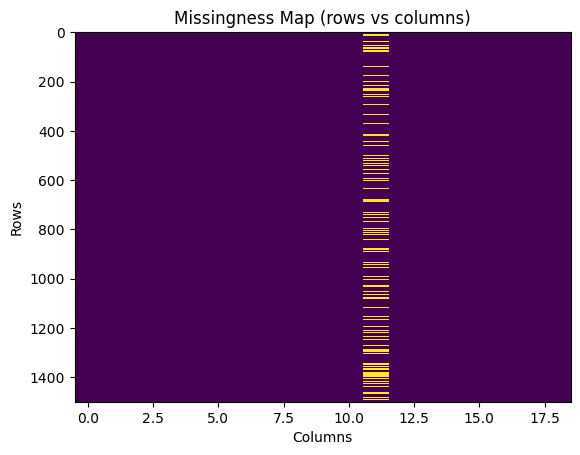

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.imshow(df.isnull(), aspect='auto', interpolation='nearest')
plt.title("Missingness Map (rows vs columns)")
plt.xlabel("Columns"); plt.ylabel("Rows")
plt.show()

### Histograms for numeric columns

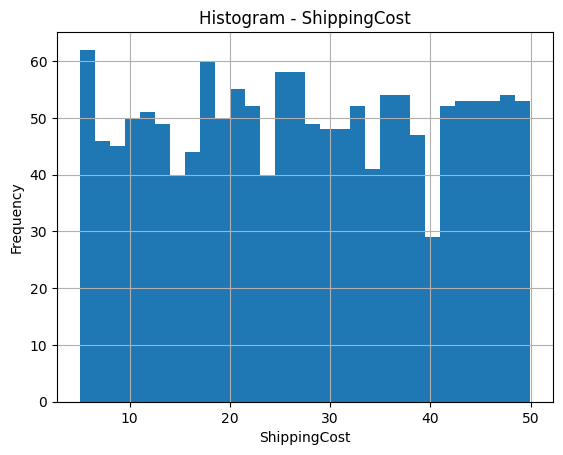

In [7]:
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

plt.figure()
df[c].dropna().hist(bins=30)
plt.title(f"Histogram - {c}")
plt.xlabel(c); plt.ylabel("Frequency")
plt.show()

### Boxplots for numeric columns

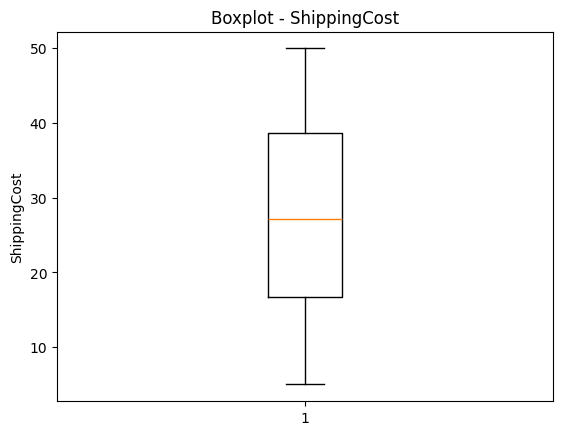

In [9]:

plt.figure()
plt.boxplot(df[c].dropna().values, vert=True, showfliers=True)
plt.title(f"Boxplot - {c}")
plt.ylabel(c)
plt.show()

### Bar plots for top categories

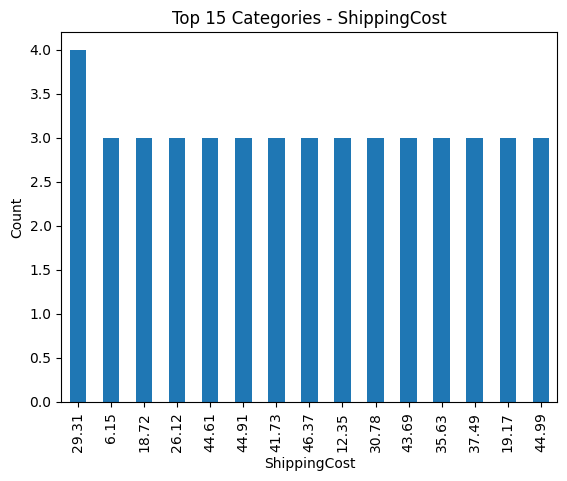

In [10]:
cat_cols = [c for c in df.columns if df[c].dtype == 'object' or str(df[c].dtype).startswith('category')]

counts = df[c].value_counts().head(15)
plt.figure()
counts.plot(kind='bar')
plt.title(f"Top 15 Categories - {c}")
plt.xlabel(c); plt.ylabel("Count")
plt.show()


### Correlation heatmap

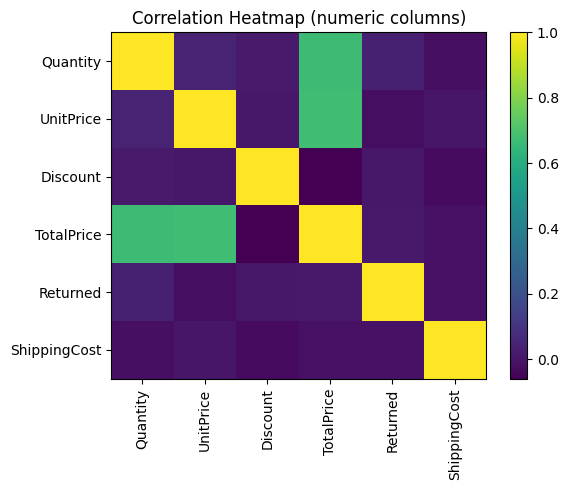

In [11]:
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(6,5))
    plt.imshow(corr, interpolation='nearest', aspect='auto')
    plt.title("Correlation Heatmap (numeric columns)")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

### Scatter matrix for first few numeric columns

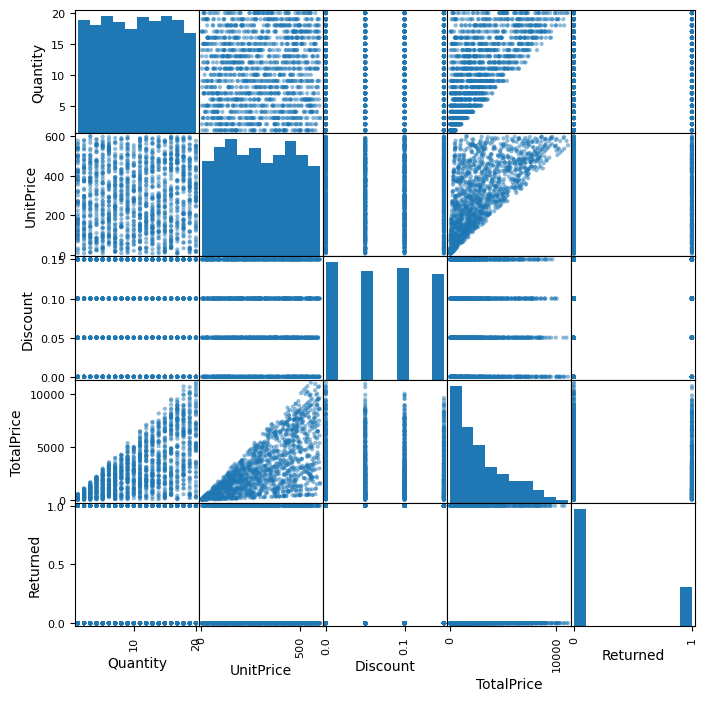

In [12]:
from pandas.plotting import scatter_matrix
if len(num_cols) >= 2:
    sel = num_cols[:5]
    scatter_matrix(df[sel].dropna(), diagonal='hist', figsize=(8,8))
    plt.show()

### Groupby aggregations

In [13]:
 display(df.groupby(c)[num_cols].agg(['count','mean','sum']).sort_values((num_cols[0],'sum'), ascending=False).head(15))

Quantity                UnitPrice                      Discount  \
                count       mean sum     count        mean      sum    count   
ShippingCost                                                                   
48.33               3  16.000000  48         3  288.466667   865.40        3   
29.31               4  11.750000  47         4  415.625000  1662.50        4   
10.20               3  15.333333  46         3  433.556667  1300.67        3   
29.19               3  14.000000  42         3  450.076667  1350.23        3   
39.98               3  14.000000  42         3  372.800000  1118.40        3   
37.49               3  13.666667  41         3  477.210000  1431.63        3   
35.37               3  13.666667  41         3  228.400000   685.20        3   
26.12               3  12.666667  38         3  272.806667   818.42        3   
26.32               3  12.333333  37         3  361.696667  1085.09        3   
26.97               2  18.500000  37         2  355.365000   710.73        2   
16.40               2  18.500000  37         2  323.915000   647.83        2   
11.17               2  18.500000  37         2  341.495000   682.99        2   
11.21               2  18.500000  37         2  255.130000   510.26        2   
49.93               3  12.333333  37         3  329.503333   988.51        3   
14.88               2  18.500000  37         2  470.820000   941.64        2   

                             TotalPrice                          Returned  \
                  mean   sum      count         mean         sum    count   
ShippingCost                                                                
48.33         0.066667  0.20          3  4011.947833  12035.8435        3   
29.31         0.100000  0.40          4  4323.467000  17293.8680        4   
10.20         0.100000  0.30          3  6192.725000  18578.1750        3   
29.19         0.050000  0.15          3  6145.391333  18436.1740        3   
39.98         0.033333  0.10          3  4870.836000  14612.5080        3   
37.49         0.083333  0.25          3  5869.971000  17609.9130        3   
35.37         0.033333  0.10          3  2423.085000   7269.2550        3   
26.12         0.050000  0.15          3  3900.497333  11701.4920        3   
26.32         0.033333  0.10          3  3300.871833   9902.6155        3   
26.97         0.000000  0.00          2  6664.030000  13328.0600        2   
16.40         0.050000  0.10          2  5671.015500  11342.0310        2   
11.17         0.125000  0.25          2  5652.949500  11305.8990        2   
11.21         0.025000  0.05          2  4604.051500   9208.1030        2   
49.93         0.066667  0.20          3  3679.318667  11037.9560        3   
14.88         0.050000  0.10          2  8273.947500  16547.8950        2   

                           ShippingCost                 
                  mean sum        count   mean     sum  
ShippingCost                                            
48.33         0.333333   1            3  48.33  144.99  
29.31         0.000000   0            4  29.31  117.24  
10.20         0.000000   0            3  10.20   30.60  
29.19         0.000000   0            3  29.19   87.57  
39.98         0.000000   0            3  39.98  119.94  
37.49         0.333333   1            3  37.49  112.47  
35.37         0.666667   2            3  35.37  106.11  
26.12         0.333333   1            3  26.12   78.36  
26.32         0.333333   1            3  26.32   78.96  
26.97         0.500000   1            2  26.97   53.94  
16.40         0.500000   1            2  16.40   32.80  
11.17         0.500000   1            2  11.17   22.34  
11.21         0.500000   1            2  11.21   22.42  
49.93         0.000000   0            3  49.93  149.79  
14.88         0.000000   0            2  14.88   29.76